In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
train=pd.read_csv("../Data/digit/train.csv")
xtrain=train.drop(columns=["label"]).values
ytrain=train['label'].values
test=pd.read_csv("../Data/digit/test.csv")
xtest=test.values

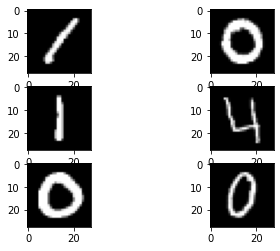

In [5]:
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(xtrain[i].reshape(28,28),cmap=plt.get_cmap('gray'))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [11]:
scaled_xtrain=scaler.transform(xtrain)
scaled_xtest=scaler.transform(xtest)

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(scaled_xtrain)

PCA()

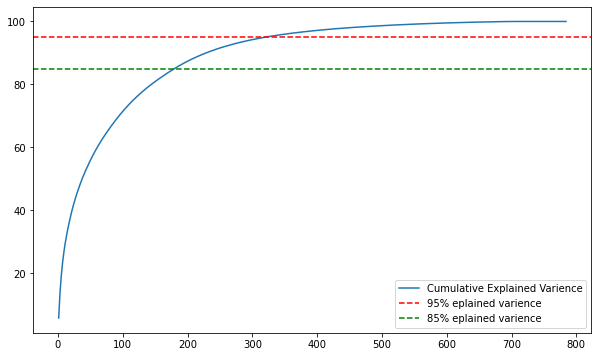

In [13]:
val=np.cumsum(pca.explained_variance_ratio_)*100
val
plt.figure(figsize=(10,6))
plt.plot(range(1,len(val)+1),val,label="Cumulative Explained Varience")
plt.axhline(y=95,color="r",linestyle="--",label="95% eplained varience")
plt.axhline(y=85,color="g",linestyle="--",label="85% eplained varience")
plt.legend()

In [14]:
pca=PCA(0.95)
pca.fit(scaled_xtrain)
pca_xtrain=pca.transform(scaled_xtrain)
pca_xtest=pca.transform(scaled_xtest)

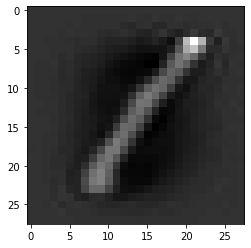

In [16]:
sample=pca.inverse_transform(pca_xtrain[0]).reshape(28,28)
plt.imshow(sample,cmap=plt.get_cmap('gray'))

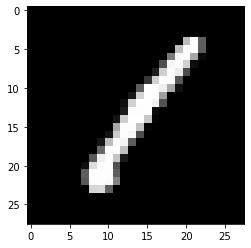

In [19]:
plt.imshow(xtrain[0].reshape(28,28),cmap=plt.get_cmap('gray'))